## **Maven Marketing Challenge**

### **About The Data Set**

Marketing campaign data of 2,240 customers of Maven Marketing, including customer profiles, product preferences, campaign successes/failures, and channel performance.



## **Import libraries**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

## **Read the data**

In [12]:
path = os.getcwd()
file = 'marketing_data.csv'
full_path_data = os.path.join(path,file)
file = 'marketing_data_dictionary.csv'
full_path_info = os.path.join(path,file)

df_data = pd.read_csv(full_path_data)
df_info = pd.read_csv(full_path_info)

In [13]:
df_data.shape

(2240, 28)

In [14]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


***Explanation of each column from the dataset***

In [15]:
df_info

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


## **Data in Action**
The main goal is to share a few insight and graphics for know more about the current data






## **Data pre-processing**

The data used for this project is sourced from the Maven Marketing Challenge. Before proceeding with the analysis, it is crucial to thoroughly understand and verify the data for any potential issues.



In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
df_data.rename(columns=lambda label: label.replace(" ",""),inplace = True)
df_data['Income'].fillna(0,inplace=True)

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

During the cleaning process, I performed two important tasks:

1. Filling empty values in the 'Income' column with 0: I replaced any missing or empty values in the 'Income' column with zeros. This ensures consistency in the data and avoids any issues that could arise from missing values.

2. Removing extra spaces in column labels: I eliminated any additional spaces that may exist at the beginning or end of the column labels. This helps ensure consistency and improves the readability of the data.

## **Exploratory Analysis**

In [19]:
df_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,51687.459375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25609.342730,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_data.describe(include=['O'])

,Education,Marital_Status,Dt_Customer,Country
count,2240,2240,2240,2240
unique,5,8,663,8
top,Graduation,Married,2012-08-31,Spain
freq,1127,864,12,1095


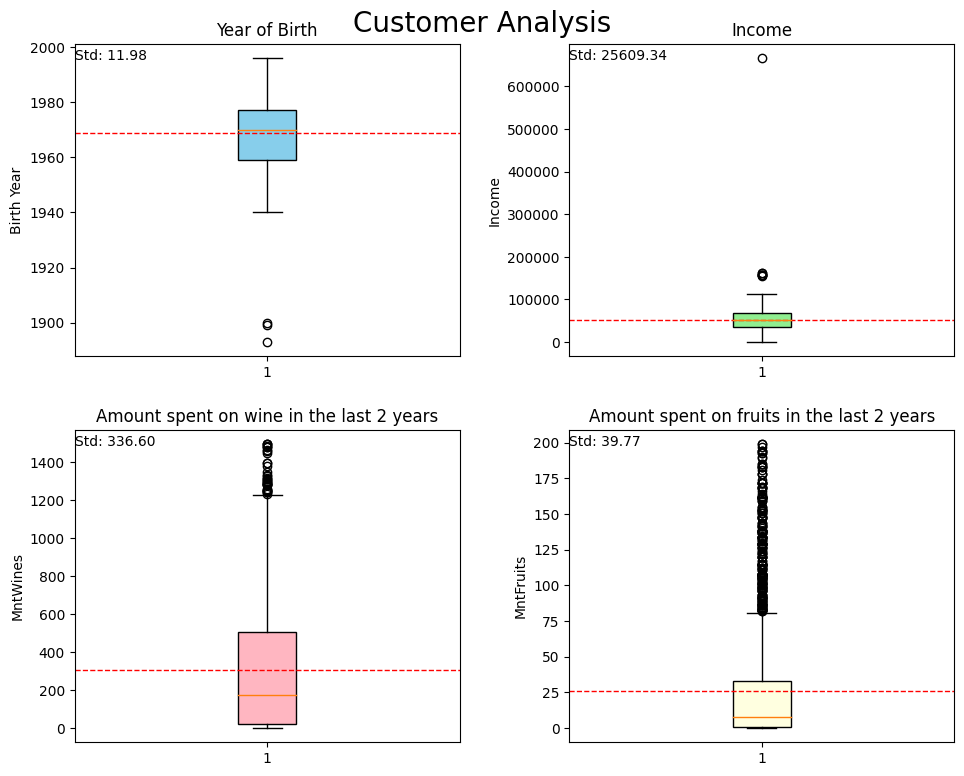

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow']

axes[0][0].boxplot(df_data['Year_Birth'], patch_artist=True, boxprops=dict(facecolor=colors[0]))
axes[0][0].set_title('Year of Birth')
axes[0][0].set_ylabel('Birth Year')
axes[0][0].set_ylabel('Birth Year')
axes[0][0].axhline(df_data['Year_Birth'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[0][0].text(0.0, 0.95, f"Std: {df_data['Year_Birth'].std():.2f}", transform=axes[0][0].transAxes, ha='left')

axes[0][1].boxplot(df_data['Income'], patch_artist=True, boxprops=dict(facecolor=colors[1]))
axes[0][1].set_title('Income')
axes[0][1].set_ylabel('Income')
axes[0][1].axhline(df_data['Income'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[0][1].text(0.0, 0.95, f"Std: {df_data['Income'].std():.2f}", transform=axes[0][1].transAxes, ha='left')

axes[1][0].boxplot(df_data['MntWines'], patch_artist=True, boxprops=dict(facecolor=colors[2]))
axes[1][0].set_title('Amount spent on wine in the last 2 years')
axes[1][0].set_ylabel('MntWines')
axes[1][0].axhline(df_data['MntWines'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[1][0].text(0.0, 0.95, f"Std: {df_data['MntWines'].std():.2f}", transform=axes[1][0].transAxes, ha='left')

axes[1][1].boxplot(df_data['MntFruits'], patch_artist=True, boxprops=dict(facecolor=colors[3]))
axes[1][1].set_title('Amount spent on fruits in the last 2 years')
axes[1][1].set_ylabel('MntFruits')
axes[1][1].axhline(df_data['MntFruits'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[1][1].text(0.0, 0.95, f"Std: {df_data['MntFruits'].std():.2f}", transform=axes[1][1].transAxes, ha='left')

plt.tight_layout(pad=2.0)
fig.suptitle('Customer Analysis', fontsize=20)
plt.show()

### **Insights:**

*   The majority of the people born between 1970 and 1977, the outliers of the data are not significative relevant number, would be necessary made a age segmentation for know more about the customers.
*   The presence of a minimum income of 0 and a maximum income of 666666 could be an indicative or missing data or wrong data, the target segmentation is between 34722 and 68289, it's necesary crear also a segementation for range of incomes and understand the needs of each segment
*   Some customers did not spend anything on wines, which suggests a potential market segment with no interest or preference for wine-related products.There is a substantial range of spending on wines, with some customers spending up to 1493. This indicates a potential market segment with a higher affinity for wine products and a willingness to spend more.
*   The standard deviation indicates a wide variation in the spending behavior of customers on fruits, with some customers spending significantly more than the average and others spending very little or nothing.The majority of customers spent less than 8 on fruits, as indicated by the median value. This suggests that a significant portion of the customer base either has a limited preference for fruits or prefers to allocate their budget towards other product categories.



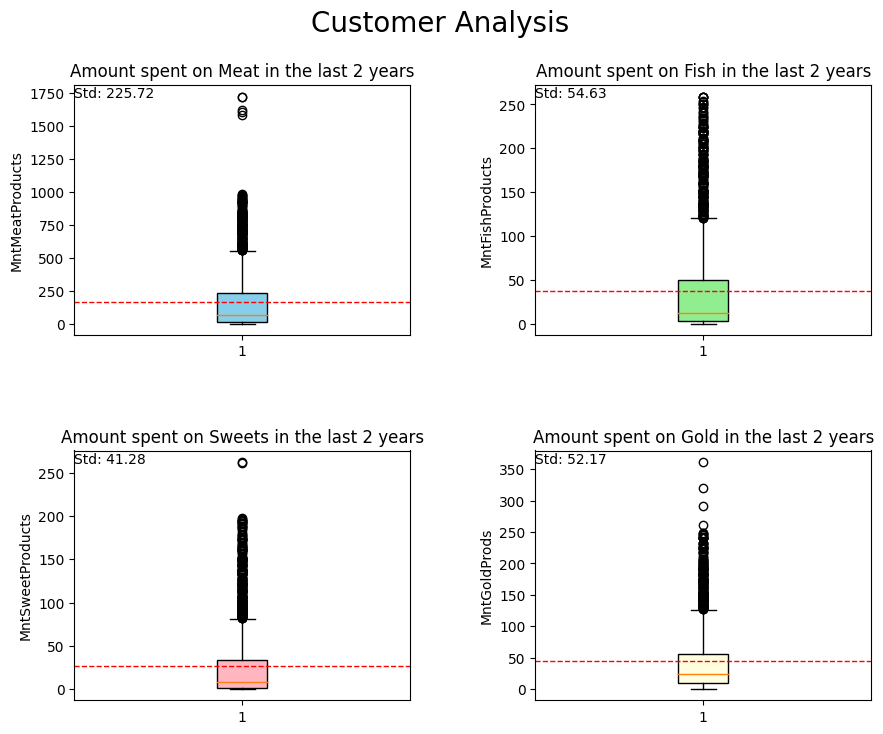

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow']


axes[0][0].boxplot(df_data['MntMeatProducts'],patch_artist=True, boxprops=dict(facecolor=colors[0]))
axes[0][0].set_title('Amount spent on Meat in the last 2 years')
axes[0][0].set_ylabel('MntMeatProducts')
axes[0][0].axhline(df_data['MntMeatProducts'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[0][0].text(0.0, 0.95, f"Std: {df_data['MntMeatProducts'].std():.2f}", transform=axes[0][0].transAxes, ha='left')


axes[0][1].boxplot(df_data['MntFishProducts'],patch_artist=True, boxprops=dict(facecolor=colors[1]))
axes[0][1].set_title('Amount spent on Fish in the last 2 years')
axes[0][1].set_ylabel('MntFishProducts')
axes[0][1].axhline(df_data['MntFishProducts'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[0][1].text(0.0, 0.95, f"Std: {df_data['MntFishProducts'].std():.2f}", transform=axes[0][1].transAxes, ha='left')

axes[1][0].boxplot(df_data['MntSweetProducts'],patch_artist=True, boxprops=dict(facecolor=colors[2]))
axes[1][0].set_title('Amount spent on Sweets in the last 2 years')
axes[1][0].set_ylabel('MntSweetProducts')
axes[1][0].axhline(df_data['MntSweetProducts'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[1][0].text(0.0, 0.95, f"Std: {df_data['MntSweetProducts'].std():.2f}", transform=axes[1][0].transAxes, ha='left')


axes[1][1].boxplot(df_data['MntGoldProds'],patch_artist=True, boxprops=dict(facecolor=colors[3]))
axes[1][1].set_title('Amount spent on Gold in the last 2 years')
axes[1][1].set_ylabel('MntGoldProds')
axes[1][1].axhline(df_data['MntGoldProds'].mean(),color='red', linestyle='dashed', linewidth=1)
axes[1][1].text(0.0, 0.95, f"Std: {df_data['MntGoldProds'].std():.2f}", transform=axes[1][1].transAxes, ha='left')

plt.tight_layout(pad=5.0)
fig.suptitle('Customer Analysis', fontsize=20)
plt.show()

### **Insights:**

* Our target market is the customer who at leaste spent money in the products, because is there a customer segemetation that maybe dont buy these kind or products could be due to personal preferences or dietary restrictions.

* In this data there are many outliers so is necesary to check if we use that data with outliers of is maybe neccesary to filter those values or try to normalized the data
* Wine is the category with more purchases follow it by meat, then fish, gold, sweets and finally fruits

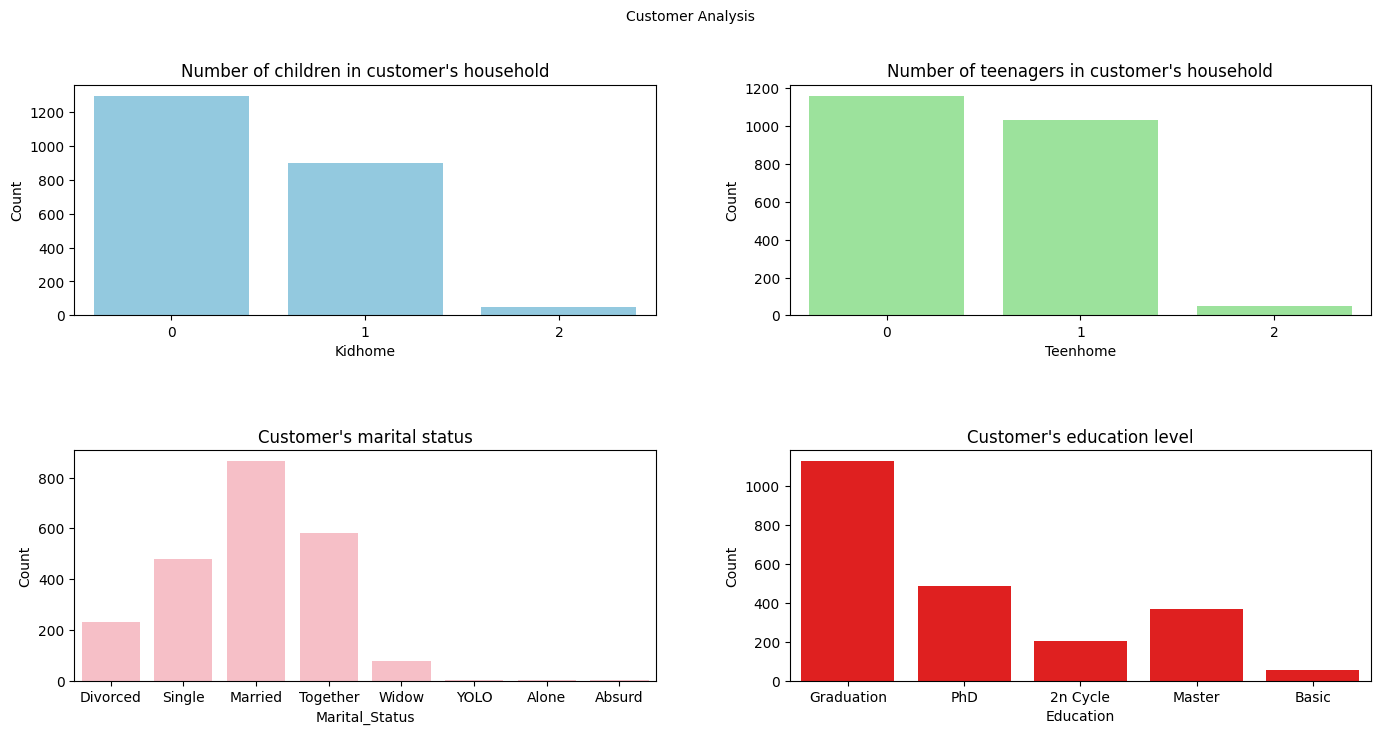

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
colors = ['skyblue', 'lightgreen', 'lightpink', 'red']


sns.countplot(x=df_data['Kidhome'], ax=axes[0][0], color=colors[0])
axes[0][0].set_title("Number of children in customer's household")
axes[0][0].set_ylabel('Count')
axes[0][0].set_xlabel('Kidhome')

sns.countplot(x=df_data['Teenhome'], ax=axes[0][1], color=colors[1])
axes[0][1].set_title("Number of teenagers in customer's household")
axes[0][1].set_ylabel('Count')
axes[0][1].set_xlabel('Teenhome')

sns.countplot(x=df_data['Marital_Status'], ax=axes[1][0], color=colors[2])
axes[1][0].set_title("Customer's marital status")
axes[1][0].set_ylabel('Count')
axes[1][0].set_xlabel('Marital_Status')

sns.countplot(x=df_data['Education'], ax=axes[1][1], color=colors[3])
axes[1][1].set_title("Customer's education level")
axes[1][1].set_ylabel('Count')
axes[1][1].set_xlabel('Education')

plt.tight_layout(pad=5.0)
fig.suptitle('Customer Analysis', fontsize=10)
plt.show()

### **Insights:**
* The majority of the customer don't have child's or at least has one.
* Most are married or are together, and the grant majority has are graduated

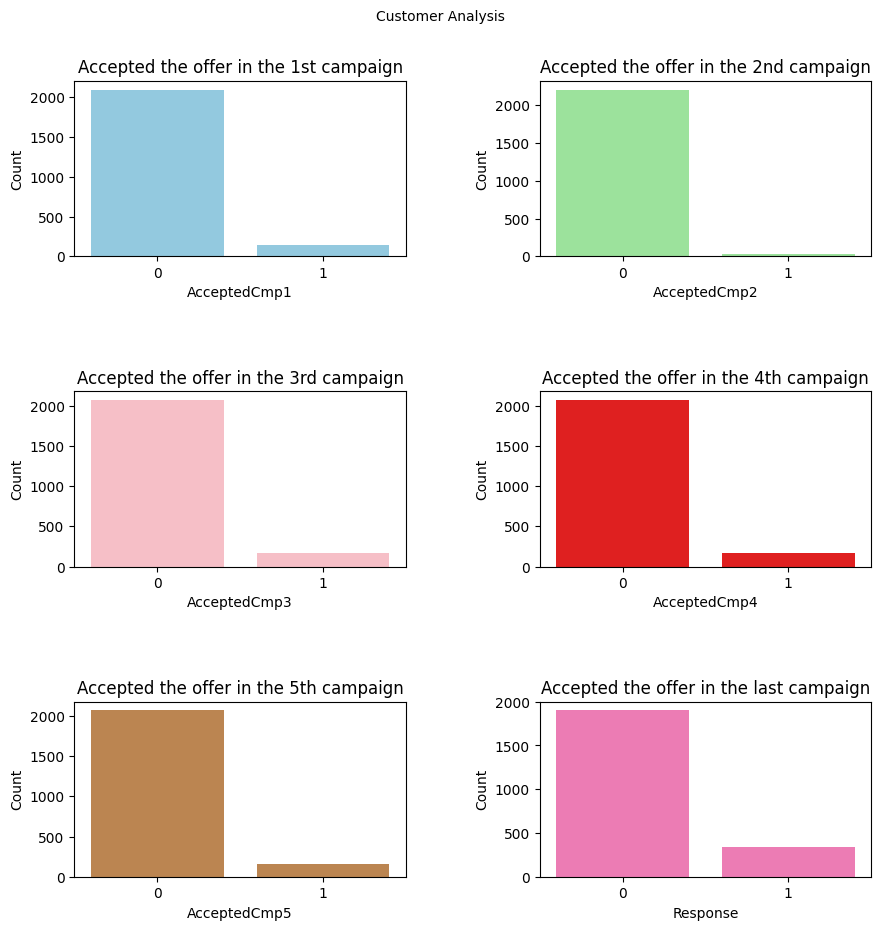

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
colors = ['skyblue', 'lightgreen', 'lightpink', 'red','peru','hotpink']


sns.countplot(x=df_data['AcceptedCmp1'], ax=axes[0][0], color=colors[0])
axes[0][0].set_title("Accepted the offer in the 1st campaign")
axes[0][0].set_ylabel('Count')
axes[0][0].set_xlabel('AcceptedCmp1')

sns.countplot(x=df_data['AcceptedCmp2'], ax=axes[0][1], color=colors[1])
axes[0][1].set_title("Accepted the offer in the 2nd campaign")
axes[0][1].set_ylabel('Count')
axes[0][1].set_xlabel('AcceptedCmp2')

sns.countplot(x=df_data['AcceptedCmp3'], ax=axes[1][0], color=colors[2])
axes[1][0].set_title("Accepted the offer in the 3rd campaign")
axes[1][0].set_ylabel('Count')
axes[1][0].set_xlabel('AcceptedCmp3')

sns.countplot(x=df_data['AcceptedCmp4'], ax=axes[1][1], color=colors[3])
axes[1][1].set_title("Accepted the offer in the 4th campaign")
axes[1][1].set_ylabel('Count')
axes[1][1].set_xlabel('AcceptedCmp4')

sns.countplot(x=df_data['AcceptedCmp5'], ax=axes[2][0], color=colors[4])
axes[2][0].set_title("Accepted the offer in the 5th campaign")
axes[2][0].set_ylabel('Count')
axes[2][0].set_xlabel('AcceptedCmp5')

sns.countplot(x=df_data['Response'], ax=axes[2][1], color=colors[5])
axes[2][1].set_title("Accepted the offer in the last campaign")
axes[2][1].set_ylabel('Count')
axes[2][1].set_xlabel('Response')

plt.tight_layout(pad=5.0)
fig.suptitle('Customer Analysis', fontsize=10)
plt.show()

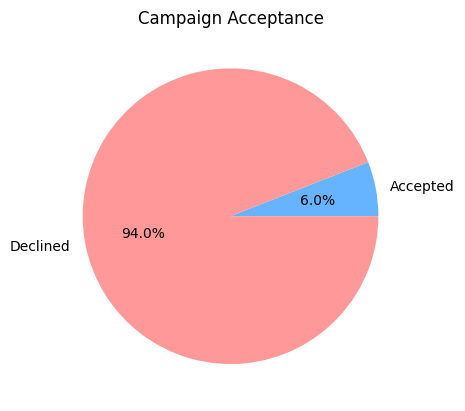

In [25]:
df_cus = df_data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]


df_campaigns = {'Accepted' :0 ,
                'Declined': 0}

for col in df_cus.columns:
    for row in df_cus[col]:
        if row == 1:
            if df_campaigns['Accepted'] == 0:
                df_campaigns['Accepted'] = 1
            else:
                df_campaigns['Accepted'] += 1
        else:
            if df_campaigns['Declined'] == 0:
                df_campaigns['Declined'] = 1
            else:
                df_campaigns['Declined'] += 1

labels = list(df_campaigns.keys())
values = list(df_campaigns.values())
colors = ['#66b3ff', '#ff9999']
plt.pie(values, labels=labels, autopct='%1.1f%%',colors=colors)
plt.title('Campaign Acceptance')
plt.show()

### **Insights:**

* The results of accepted campaings in general show a result with a low rate of acceptation, my first inferences regarding of this result is because most of the customer have a older age and could be possible that the campaing was released in a electronics media.

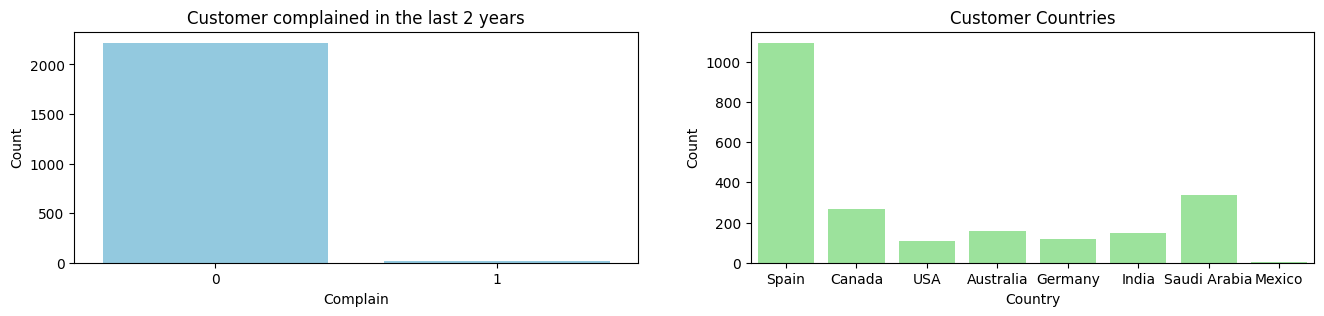

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 3))
colors = ['skyblue', 'lightgreen']


sns.countplot(x=df_data['Complain'], ax=axes[0], color=colors[0])
axes[0].set_title("Customer complained in the last 2 years")
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Complain')

sns.countplot(x=df_data['Country'], ax=axes[1], color=colors[1])
axes[1].set_title("Customer Countries")
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Country')
plt.show()

### **Insights:**

* The number of complaine in the last two years have been enough good, that mean that the service and products have a good quality but is neccesary to understand that low amount of complains,

* The main market for the campany is Spain, then Saudi Arabia and in third position Canada, Also could be possible tranform this data to values for try to provide more information using the on-shot process or the dummy procces

After analyse customer data I have decided to add a column with the age of each customer for have more information and create a segmentation more accurate about the customers

In [27]:
df_data['Age'] = 2023 - df_data['Year_Birth']

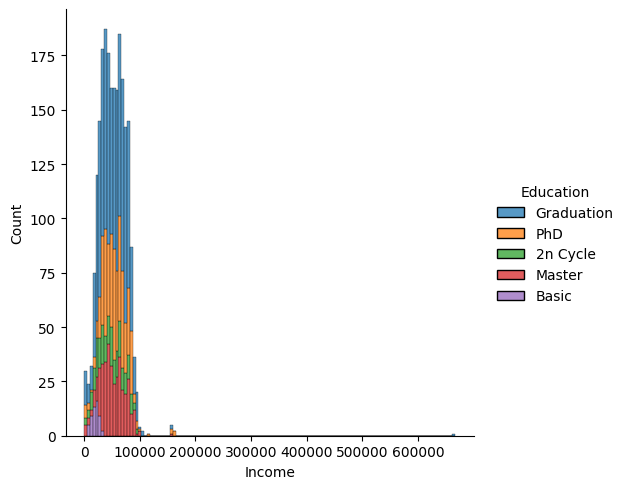

In [28]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='Education')

plt.show()


### **Insights:**

* The majority of the customer only have been graduated, and that population are located in the totality of the bell, the perons with basic education representa a minority and also is the group with less incomes, the second customer segmetation is with eduction in PHD

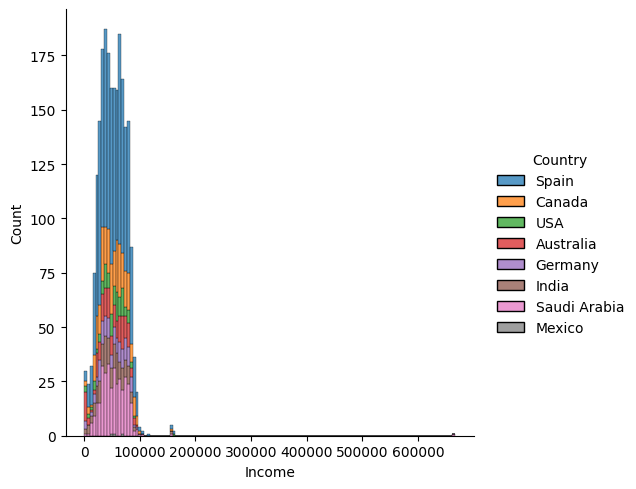

In [29]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='Country')

plt.show()

### **Insights:**

* Spain is the principal market and also counts with the customer with more incomes and in the second place Canada

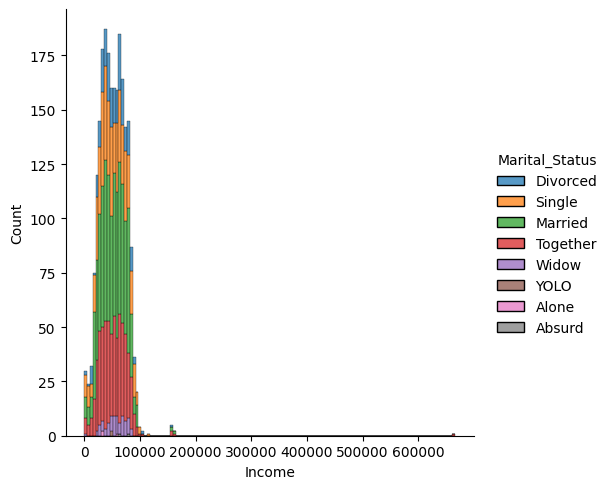

In [30]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='Marital_Status')

plt.show()

### **Insights:**

* Almos or even none representation of people with a marital status YOLO, Alone and Absurd.
* Married, Together and Single are the top customer

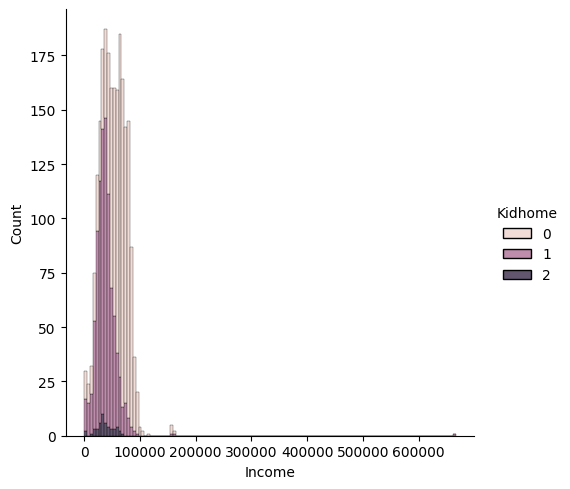

In [31]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='Kidhome')
plt.show()

### **Insights:**
* In this case, when the customer has at least 1 kid his incomes are closer to the button by the other hand if the customer doesn't have kids  his incomes are more distributed closer of the right of the graph


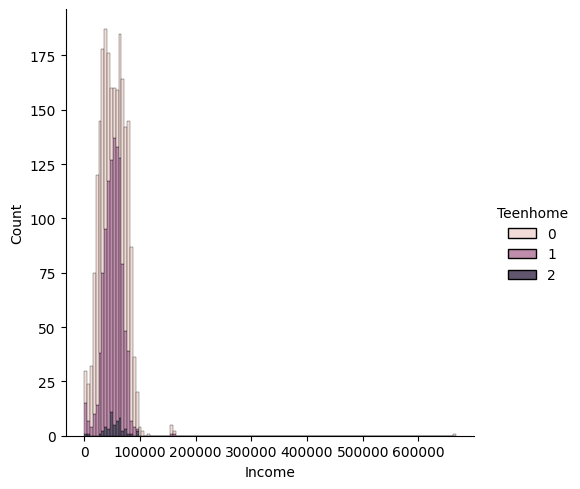

In [32]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='Teenhome')
plt.show()

### **Insights:**

* This is the contrary case of the previous graph if the customer at least has a teeneger his incomes are closer to the right part

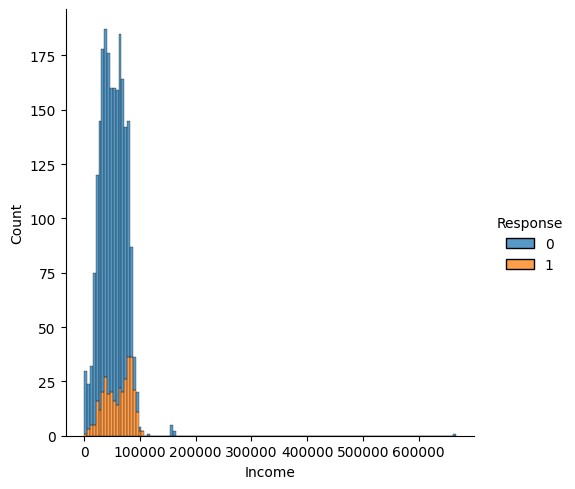

In [33]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='Response')
plt.show()

### **Insights:**

*  Its possible see a relation between incomes and the response of campaigns, looks a tendency of improve when they incomes start to increase

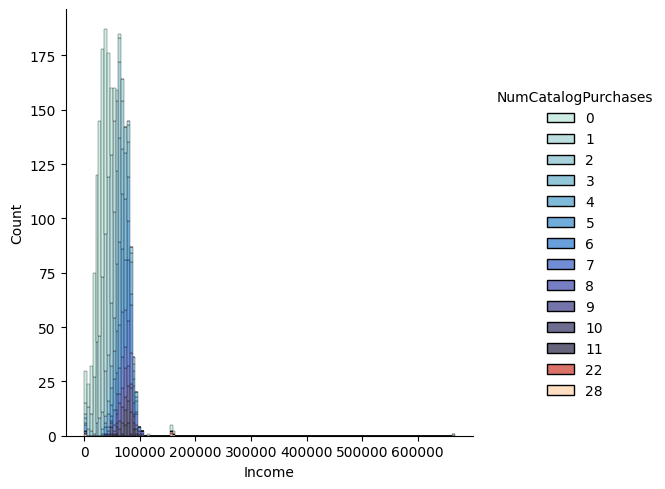

In [34]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='NumCatalogPurchases',palette="icefire")
plt.show()

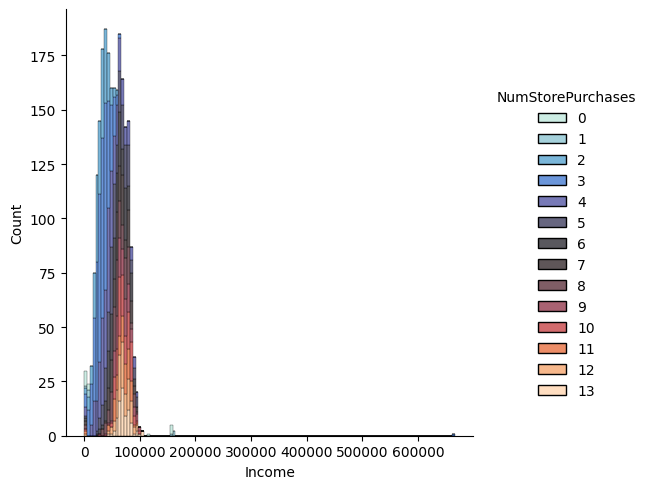

In [35]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='NumStorePurchases',palette="icefire")
plt.show()

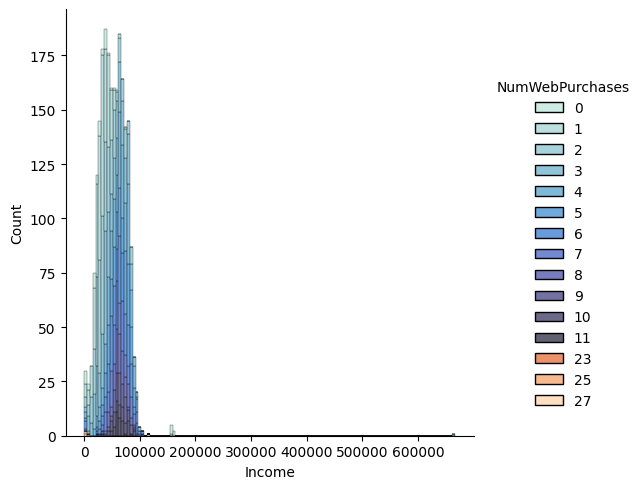

In [36]:
sns.displot(data=df_data, x='Income',multiple = 'stack', hue='NumWebPurchases',palette="icefire")
plt.show()

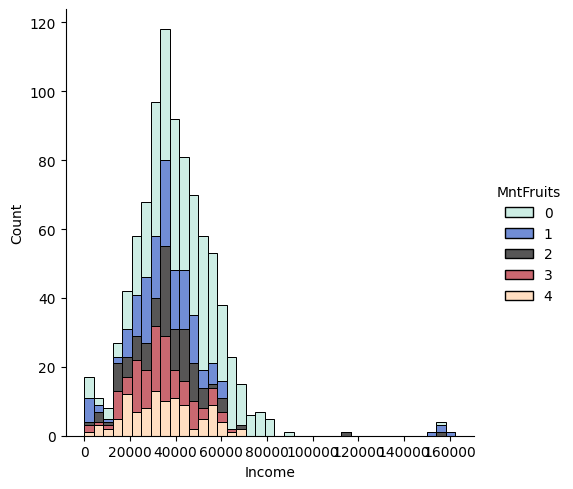

In [37]:
top_categories = df_data['MntFruits'].value_counts().nlargest(5).index
filtered_data = df_data[df_data['MntFruits'].isin(top_categories)]

sns.displot(data=filtered_data, x='Income', multiple='stack', hue='MntFruits', palette="icefire")
plt.show()


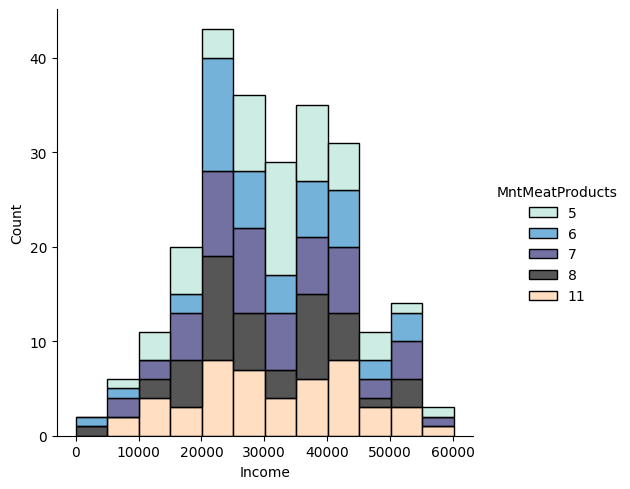

In [38]:
top_categories = df_data['MntMeatProducts'].value_counts().nlargest(5).index
filtered_data = df_data[df_data['MntMeatProducts'].isin(top_categories)]
sns.displot(data=filtered_data, x='Income', multiple='stack', hue='MntMeatProducts', palette="icefire")
plt.show()

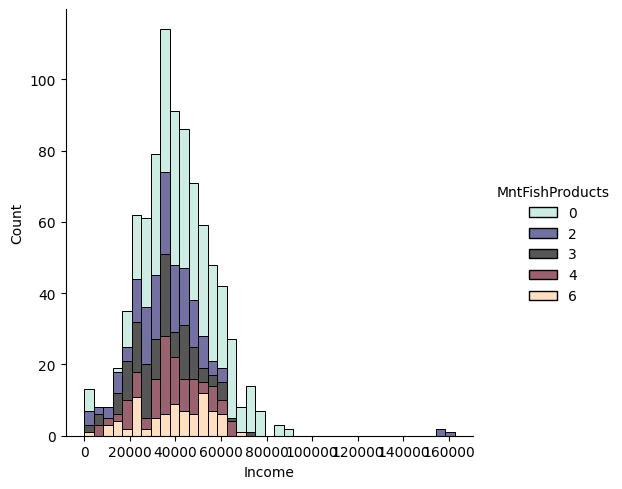

In [39]:
top_categories = df_data['MntFishProducts'].value_counts().nlargest(5).index
filtered_data = df_data[df_data['MntFishProducts'].isin(top_categories)]
sns.displot(data=filtered_data, x='Income', multiple='stack', hue='MntFishProducts', palette="icefire")
plt.show()

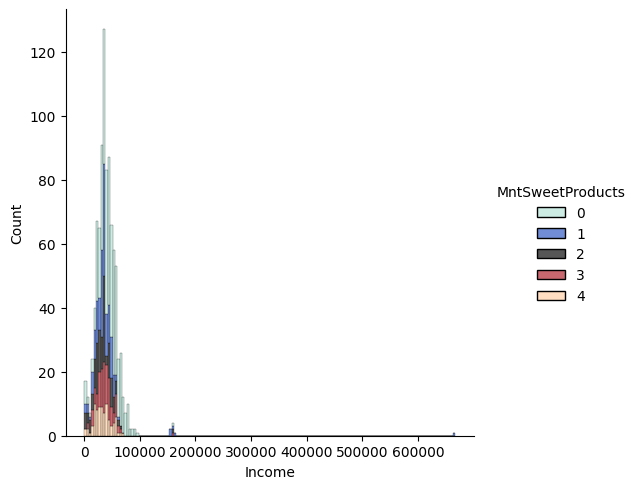

In [40]:
top_categories = df_data['MntSweetProducts'].value_counts().nlargest(5).index
filtered_data = df_data[df_data['MntSweetProducts'].isin(top_categories)]
sns.displot(data=filtered_data, x='Income', multiple='stack', hue='MntSweetProducts', palette="icefire")
plt.show()

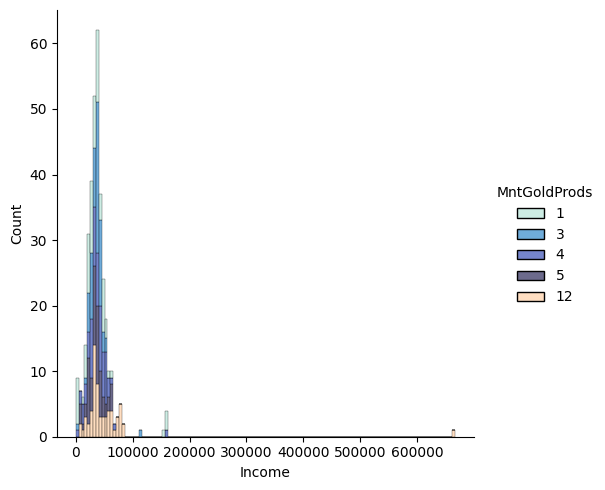

In [41]:
top_categories = df_data['MntGoldProds'].value_counts().nlargest(5).index
filtered_data = df_data[df_data['MntGoldProds'].isin(top_categories)]
sns.displot(data=filtered_data, x='Income', multiple='stack', hue='MntGoldProds', palette="icefire")
plt.show()

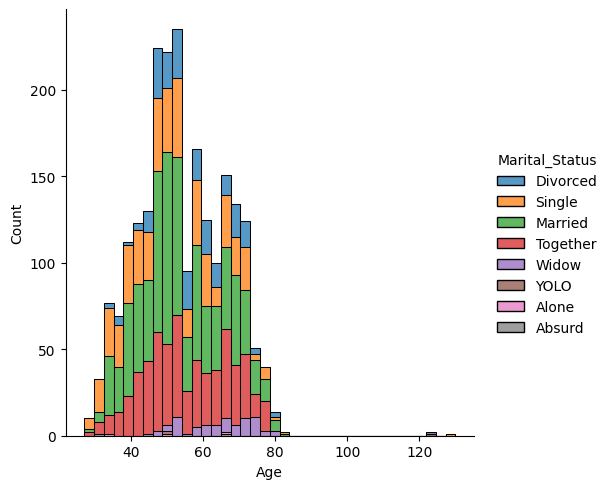

In [42]:
sns.displot(data=df_data, x='Age',multiple = 'stack', hue='Marital_Status')


plt.show()

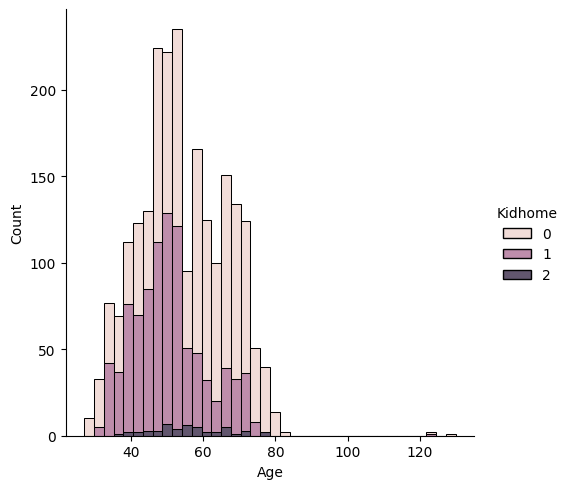

In [43]:
sns.displot(data=df_data, x='Age',multiple = 'stack', hue='Kidhome')
plt.show()

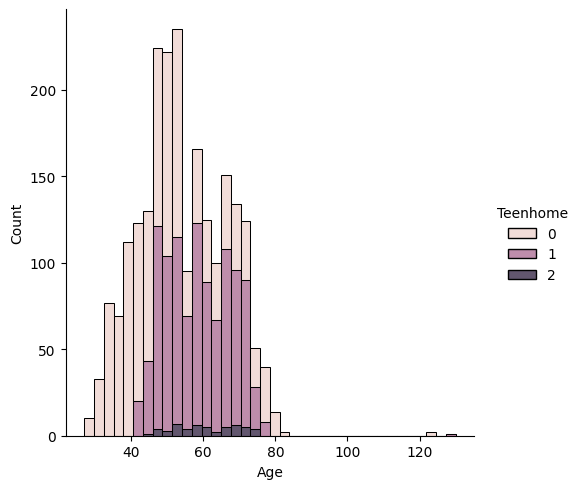

In [44]:
sns.displot(data=df_data, x='Age',multiple = 'stack', hue='Teenhome')
plt.show()

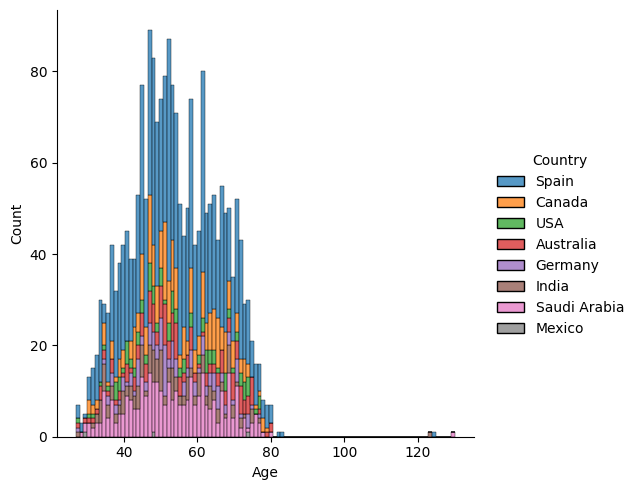

In [45]:

sns.displot(data=df_data, x='Age',multiple = 'stack', hue='Country',bins=100)
plt.show()

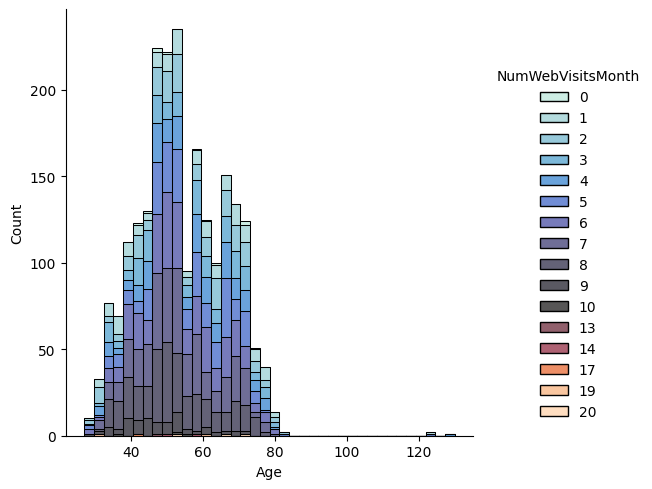

In [46]:
sns.displot(data=df_data, x='Age', multiple='stack', hue='NumWebVisitsMonth',palette="icefire")
plt.show()

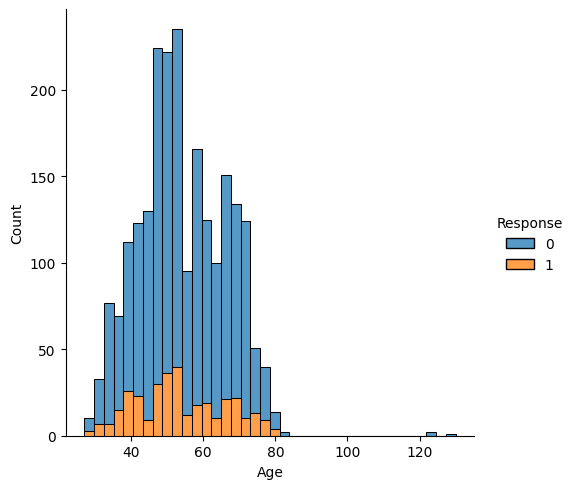

In [47]:
sns.displot(data=df_data, x='Age', multiple='stack', hue='Response')
plt.show()

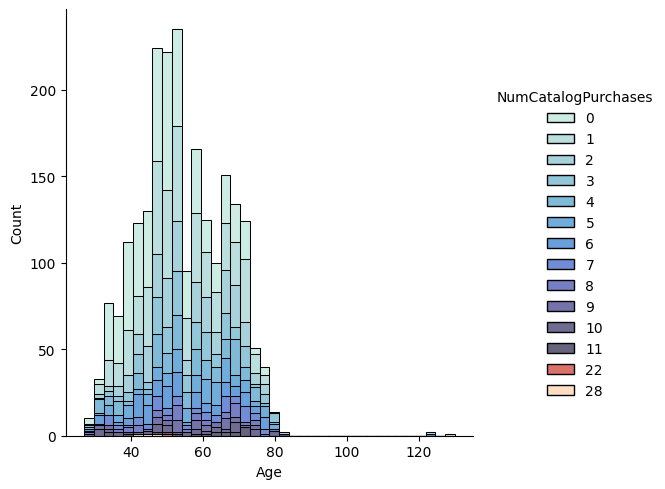

In [48]:
sns.displot(data=df_data, x='Age',multiple = 'stack', hue='NumCatalogPurchases',palette="icefire")
plt.show()

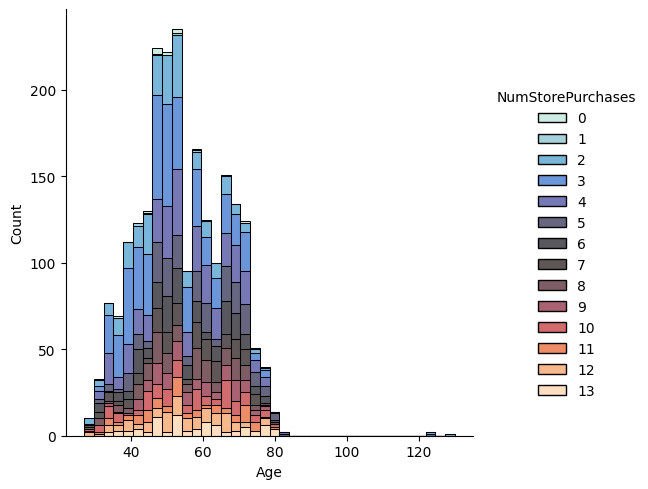

In [49]:
sns.displot(data=df_data, x='Age',multiple = 'stack', hue='NumStorePurchases',palette="icefire")
plt.show()

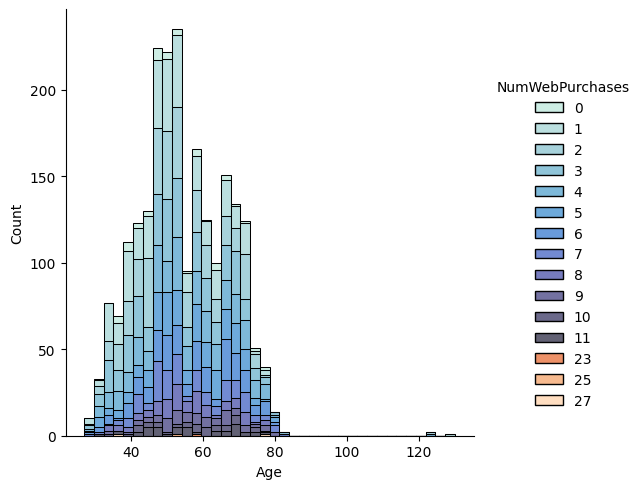

In [50]:
sns.displot(data=df_data, x='Age',multiple = 'stack', hue='NumWebPurchases',palette="icefire")
plt.show()